# Importing necessary libraries

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn.preprocessing import LabelEncoder
from matplotlib import style

# setting options
plt.style.use('ggplot')
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None


# **User Defined Functions**

Defining useful functions for data exploration.

In [105]:
def data_assessment(df):
    '''
    This function assesses the quality of the DataFrame.
    
    Args:
        df(DataFrame): Takes a DateFrame as input
    
    return:
        data(DataFrame): returns a DataFrame that depicts the data quality
        
    '''
    percent_missing = [str(round((df[col].isnull().sum()/len(df))*100,1))+'%' for col in df.columns]
    percent_complete = [str(round((1-(df[col].isnull().sum()/len(df)))*100,1))+'%' for col in df.columns]
    unique_values = [df[col].nunique() for col in df.columns]
    #mean = [df[col].mean if df[col].dtype!='object' else 'NIL' for col in df.columns]
    dtype = [df[col].dtype for col in df.columns]
    
    data = pd.DataFrame({'percent_complete':percent_complete,
                        'percent_missing':percent_missing,'unique_values':unique_values,
                        'dtype':dtype})
    data.index = df.columns
    
    return data

def numeric_dist_plot(df):
    '''
    Creates a dist plot for columns with numeric data type.
    
    Args:
        df(DataFrame): Takes a DateFrame as input
    
    return:
        None
    '''
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna(),hist_kws={'edgecolor':'white','color':'black'},kde=False)
            plt.tight_layout()
            plt.show()
            
def object_count_plot(df,hue):
    '''
    Creates a count plot for columns with data type of object.
    
    Args:
        df(DataFrame): Takes a DateFrame as input
    
    return:
        None
    '''
    
    for col in df.columns:
        if df[col].dtype == 'object':
            print(col)
            for i in df[col].value_counts().index:
                prop = (df[col].value_counts()[i]/df[col].value_counts().sum())*100
                print(i,': ',prop,'%')
            
            plt.figure(figsize=(8,4))
            g = sns.countplot(x=col,data=df,hue=hue)
            #plt.title(col)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
            
def data_process(df,df2,cat_col,num_col,target,fill_num_na=True,fill_cat_na=True,encode=True):
    '''
    Encodes df and df2 using target guided encoding technique given that the target variable is binary.
    This function also fills numerical nan with the median, it fills non numerical nan with median also.
    
    Args:
        df(DataFrame): Takes a DateFrame as input
        categorical_col(list): A list of categorical columns to be encoded
        target(string): The name of the target column
    
    return:
        df1,df2: returns the encoded and filled dataframes respectively
    '''
    #filling numeric cols 
    if fill_num_na==True:
        for col in num_col: 
            df[col].fillna(df[col].mean(), inplace = True)
            df2[col].fillna(df2[col].mean(), inplace = True)
            
    else:
        pass
            
    #filling categorical cols
    if fill_cat_na==True:
        for col in cat_col:
            df[col].fillna('missing',inplace=True)
            df2[col].fillna('missing',inplace=True)
    else:
        pass
     
    #target guided encoding
    if encode==True:
        
        if df[target].dtype=='object':
            labelencoder = LabelEncoder()
            df[target+'_encoding'] = labelencoder.fit_transform(df[target])
        else:
            pass
        
        for col in cat_col:
            ordinal_labels = df.groupby([col])[target+'_encoding'].mean().sort_values().index
            ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}
            df[col+'_encoded'] = df[col].map(ordinal_labels2)
            df2[col+'_encoded'] = df2[col].map(ordinal_labels2)
            
        df.drop(cat_col,axis=1,inplace=True) 
        df2.drop(cat_col,axis=1,inplace=True) 
        df.drop(target,axis=1,inplace=True)
    
    else:
        pass

        
    return df,df2


# Reading datasets

In [106]:
# reading the test and train datasets
train = pd.read_csv('/content/gdrive/My Drive/Projects/Train bootcamp.csv')
test = pd.read_csv('/content/gdrive/My Drive/Projects/Test bootcamp.csv')
test.drop('Applicant_ID',1,inplace=True)
train.drop('Applicant_ID',1,inplace=True)

# Visualizing the completeness of the dataset

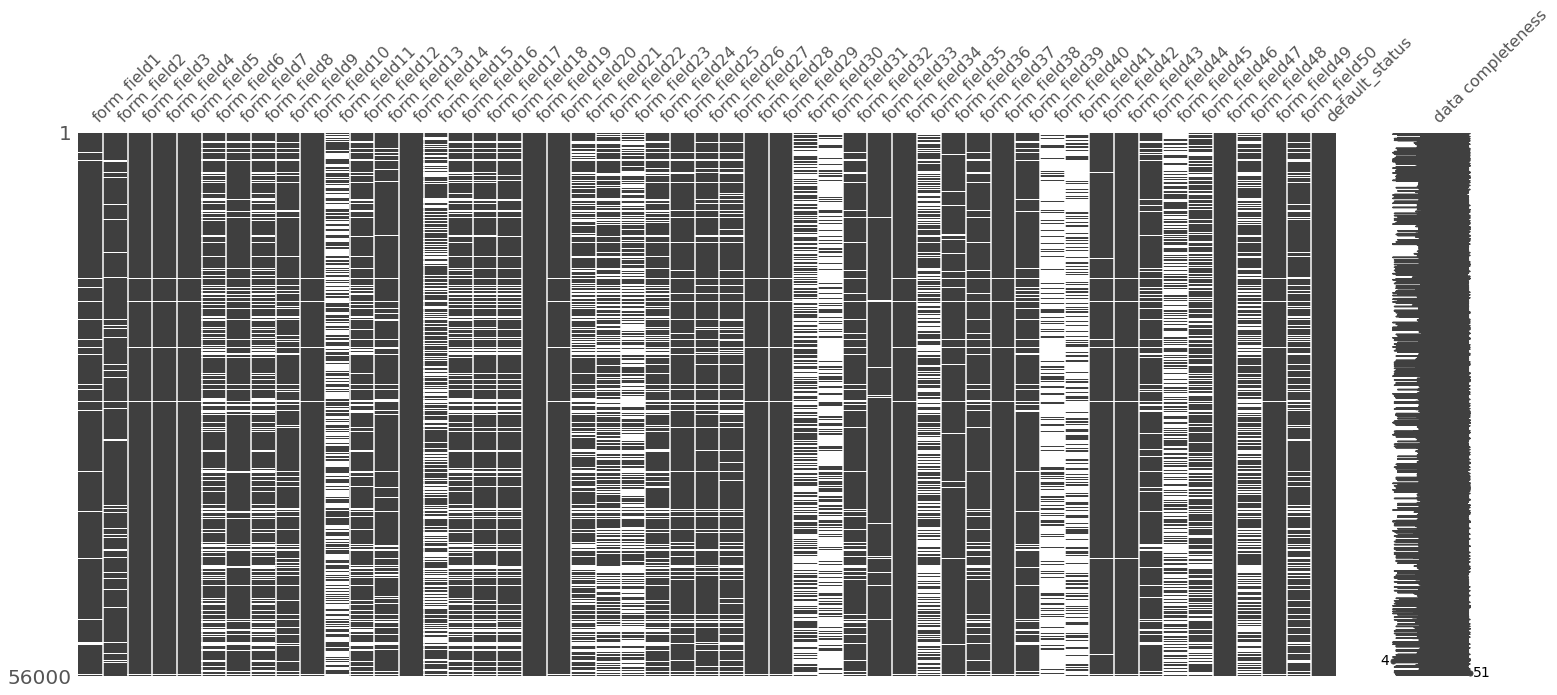

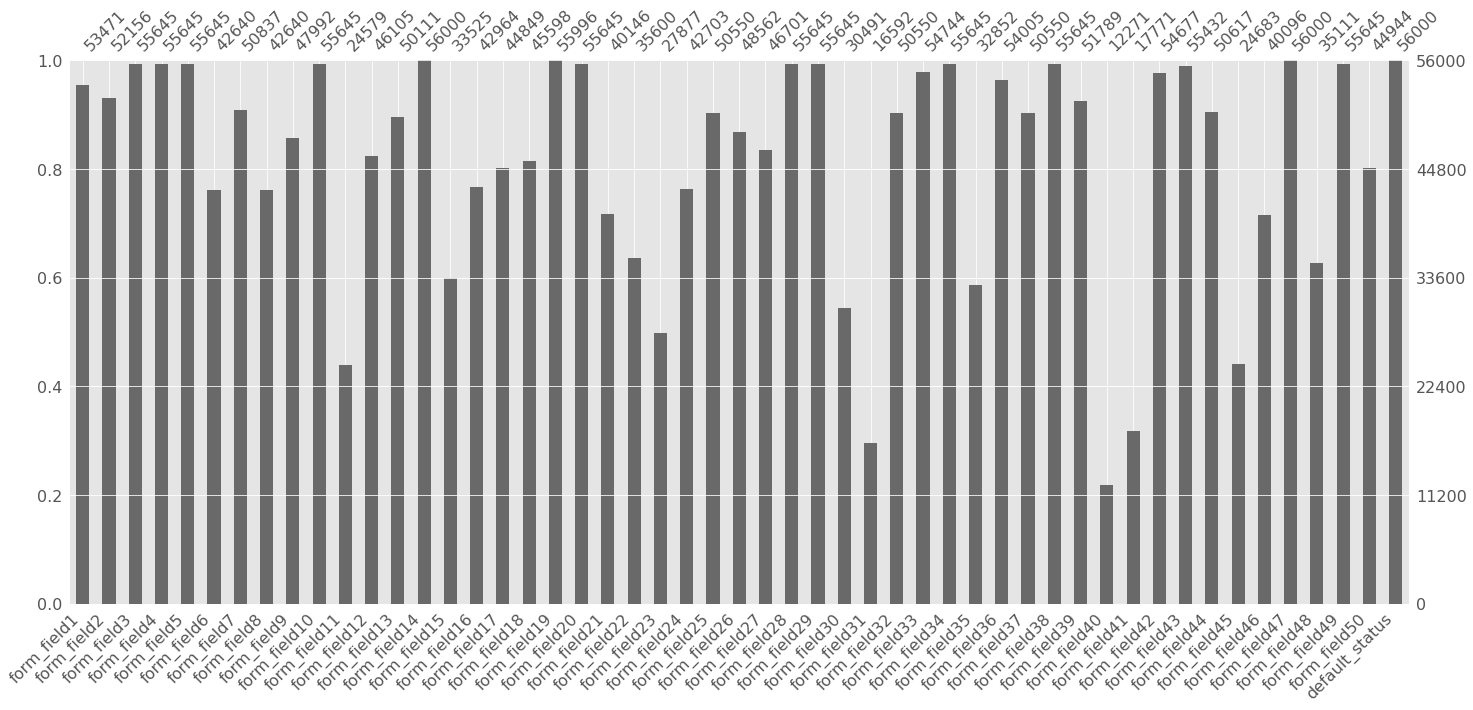

In [6]:
## Visualizing missing values

# Matrix plot
msno.matrix(train,labels=True)
plt.show()

# barplot
msno.bar(train,labels=True)
plt.show()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   form_field1     53471 non-null  float64
 1   form_field2     52156 non-null  float64
 2   form_field3     55645 non-null  float64
 3   form_field4     55645 non-null  float64
 4   form_field5     55645 non-null  float64
 5   form_field6     42640 non-null  float64
 6   form_field7     50837 non-null  float64
 7   form_field8     42640 non-null  float64
 8   form_field9     47992 non-null  float64
 9   form_field10    55645 non-null  float64
 10  form_field11    24579 non-null  float64
 11  form_field12    46105 non-null  float64
 12  form_field13    50111 non-null  float64
 13  form_field14    56000 non-null  int64  
 14  form_field15    33525 non-null  float64
 15  form_field16    42964 non-null  float64
 16  form_field17    44849 non-null  float64
 17  form_field18    45598 non-null 

In [8]:
## Assessing the dataset

data_assessment(train)

,percent_complete,percent_missing,unique_values,dtype
form_field1,95.5%,4.5%,449,float64
form_field2,93.1%,6.9%,20015,float64
form_field3,99.4%,0.6%,14617,float64
form_field4,99.4%,0.6%,2927,float64
form_field5,99.4%,0.6%,2991,float64
form_field6,76.1%,23.9%,5846,float64
form_field7,90.8%,9.2%,23199,float64
form_field8,76.1%,23.9%,12820,float64
form_field9,85.7%,14.3%,22650,float64
form_field10,99.4%,0.6%,30942,float64


In [107]:
## filling missing values 

## The data_process function can be used to fill both categorical and numerical nan values.
 # it can also encode non numerical columns unsing a technique called target guided encoding.

cat_col = list(train.select_dtypes(['object']).drop('default_status',axis=1).columns)
num_col = list(train.select_dtypes([np.number]).columns)
target = 'default_status'

df = data_process(train.copy(),test.copy(),cat_col,num_col,target,encode=False)
#df2 = data_process(toy.copy(),test.copy(),cat_col,num_col,target,fill_num_na=True,fill_cat_na=True,encode=False)

In [108]:
## assigning the cleaned datasets to new variables

train_set = df[0]
test_set = df[1]
#toy_set = df2[0]
data_assessment(train_set)

,percent_complete,percent_missing,unique_values,dtype
form_field1,100.0%,0.0%,450,float64
form_field2,100.0%,0.0%,20016,float64
form_field3,100.0%,0.0%,14618,float64
form_field4,100.0%,0.0%,2928,float64
form_field5,100.0%,0.0%,2992,float64
form_field6,100.0%,0.0%,5847,float64
form_field7,100.0%,0.0%,23200,float64
form_field8,100.0%,0.0%,12821,float64
form_field9,100.0%,0.0%,22651,float64
form_field10,100.0%,0.0%,30943,float64


# EDA

Here some basic EDA is performed

count    56000.000000
mean      3491.795665
std        184.157637
min       2990.000000
25%       3366.000000
50%       3491.795665
75%       3610.000000
max       3900.000000
Name: form_field1, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



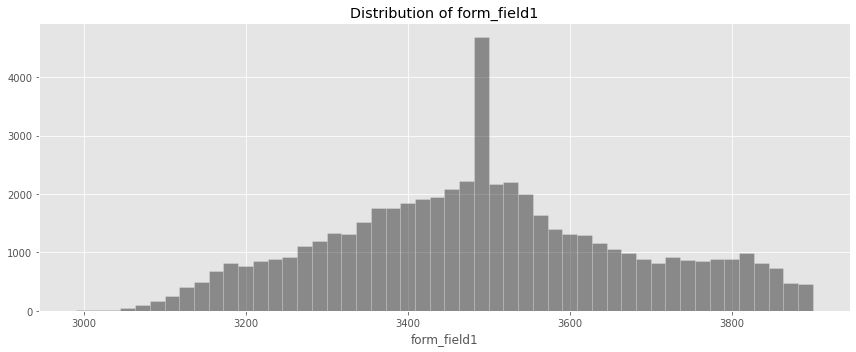

count    56000.000000
mean         0.550737
std          0.792301
min          0.000000
25%          0.080150
50%          0.308950
75%          0.675700
max         18.015050
Name: form_field2, dtype: float64


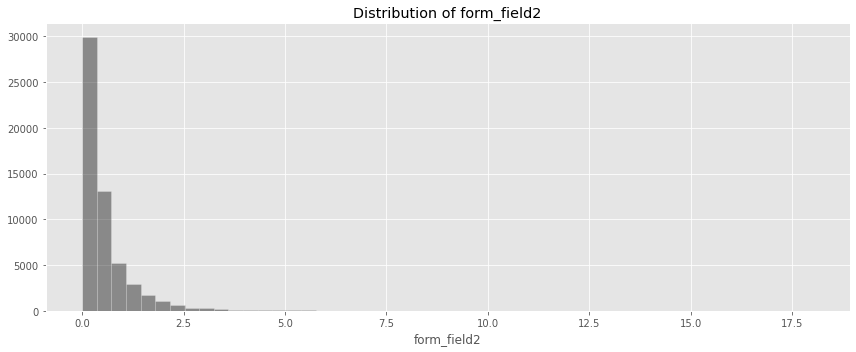

count    56000.000000
mean         1.052225
std          2.140949
min          0.000000
25%          0.000000
50%          0.063600
75%          1.270800
max         57.371600
Name: form_field3, dtype: float64


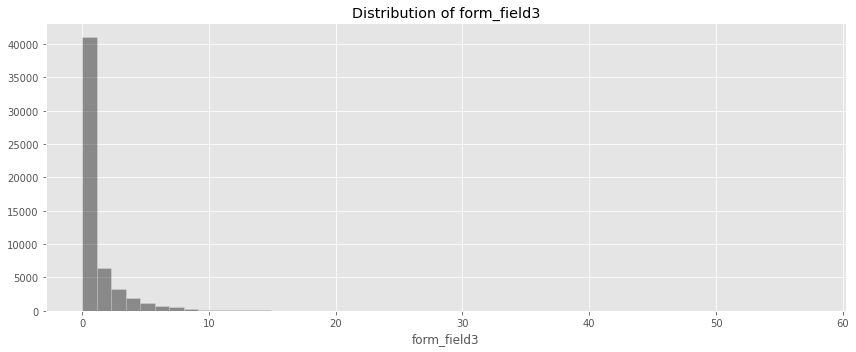

count    56000.000000
mean         0.851979
std          3.147667
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         91.672200
Name: form_field4, dtype: float64


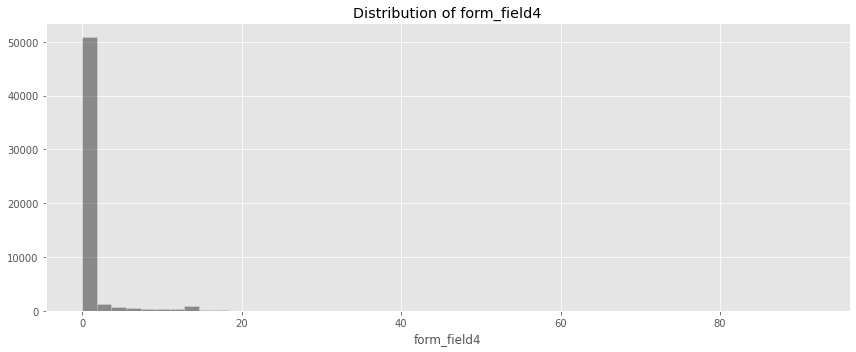

count    56000.000000
mean         1.956317
std         10.479022
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        407.748600
Name: form_field5, dtype: float64


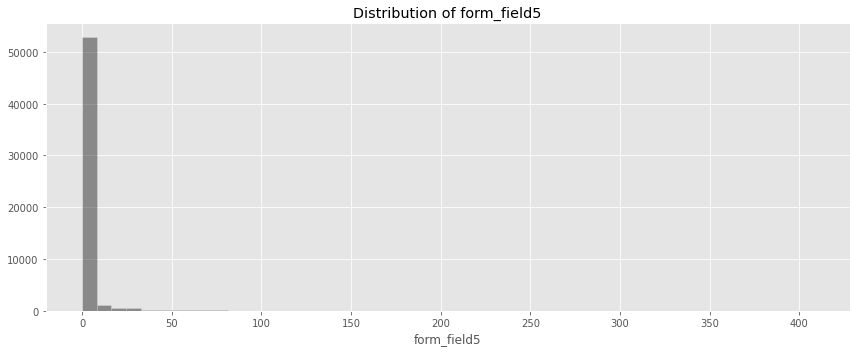

count    5.600000e+04
mean     6.244479e+05
std      1.250798e+06
min      0.000000e+00
25%      3.501000e+04
50%      2.705495e+05
75%      6.244479e+05
max      5.313546e+07
Name: form_field6, dtype: float64


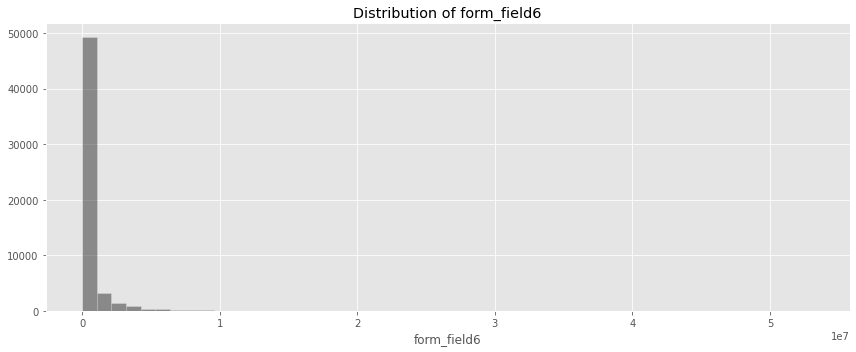

count    5.600000e+04
mean     6.865210e+06
std      1.822422e+07
min      0.000000e+00
25%      8.145660e+05
50%      3.316420e+06
75%      6.865210e+06
max      2.158794e+09
Name: form_field7, dtype: float64


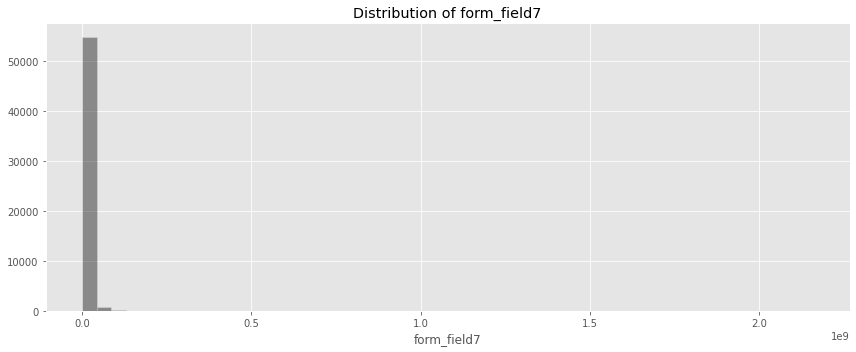

count    5.600000e+04
mean     2.626690e+06
std      3.426995e+06
min      0.000000e+00
25%      3.294830e+05
50%      2.197461e+06
75%      2.626690e+06
max      1.037397e+08
Name: form_field8, dtype: float64


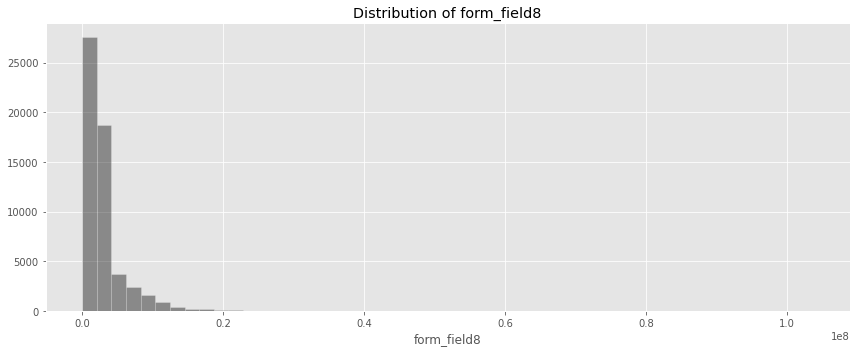

count    5.600000e+04
mean     1.316002e+07
std      1.831083e+07
min      0.000000e+00
25%      1.831315e+06
50%      8.037518e+06
75%      1.403308e+07
max      3.200533e+08
Name: form_field9, dtype: float64


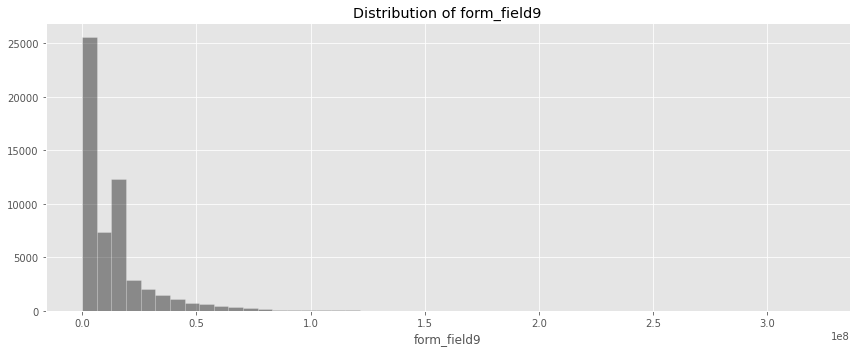

count    5.600000e+04
mean     1.185585e+07
std      2.660984e+07
min      0.000000e+00
25%      4.609650e+05
50%      3.773884e+06
75%      1.315909e+07
max      2.191361e+09
Name: form_field10, dtype: float64


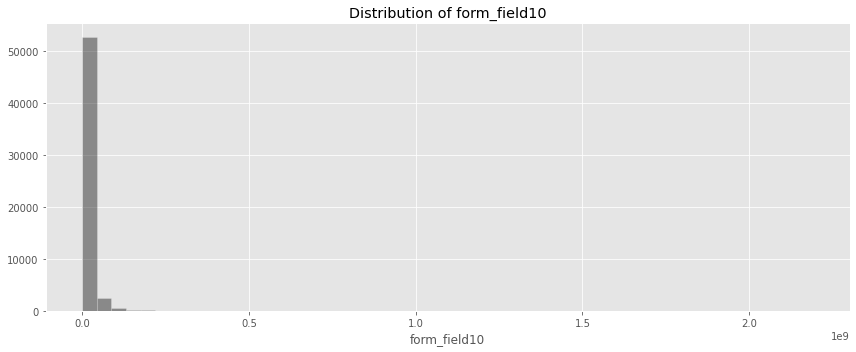

count    5.600000e+04
mean     2.054715e+06
std      3.254829e+06
min      0.000000e+00
25%      9.285430e+05
50%      2.054715e+06
75%      2.054715e+06
max      1.707430e+08
Name: form_field11, dtype: float64


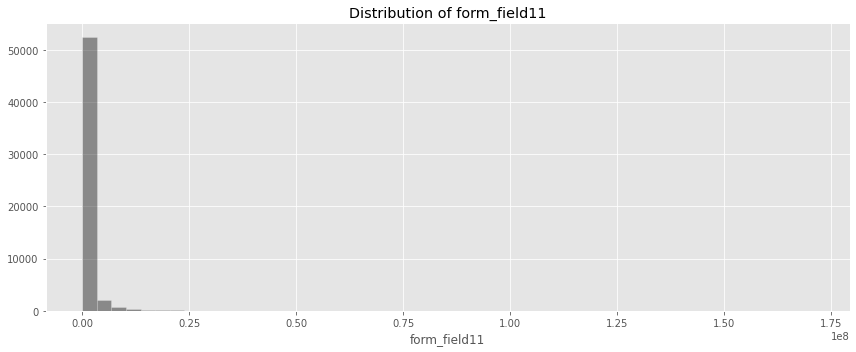

count    5.600000e+04
mean     2.771113e+06
std      4.123800e+06
min      0.000000e+00
25%      4.072830e+05
50%      1.855919e+06
75%      2.771113e+06
max      1.240439e+08
Name: form_field12, dtype: float64


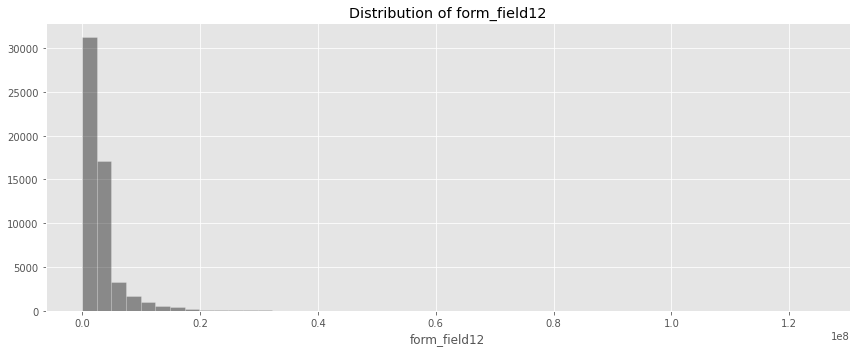

count    5.600000e+04
mean     6.009944e+06
std      2.209658e+07
min      0.000000e+00
25%      2.960290e+05
50%      2.184624e+06
75%      6.009944e+06
max      2.457824e+09
Name: form_field13, dtype: float64


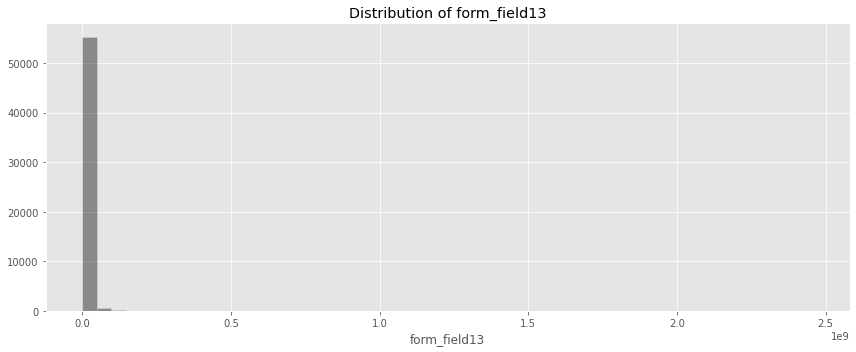

count    5.600000e+04
mean     6.914875e+07
std      2.713995e+09
min      0.000000e+00
25%      1.657646e+07
50%      2.814143e+07
75%      4.818738e+07
max      3.854990e+11
Name: form_field14, dtype: float64


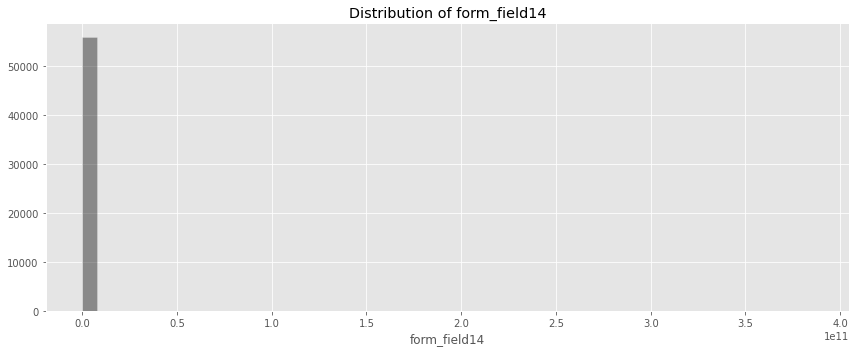

count    5.600000e+04
mean     1.145041e+08
std      8.927590e+07
min      5.395430e+05
25%      7.175815e+07
50%      1.145041e+08
75%      1.145041e+08
max      3.456119e+09
Name: form_field15, dtype: float64


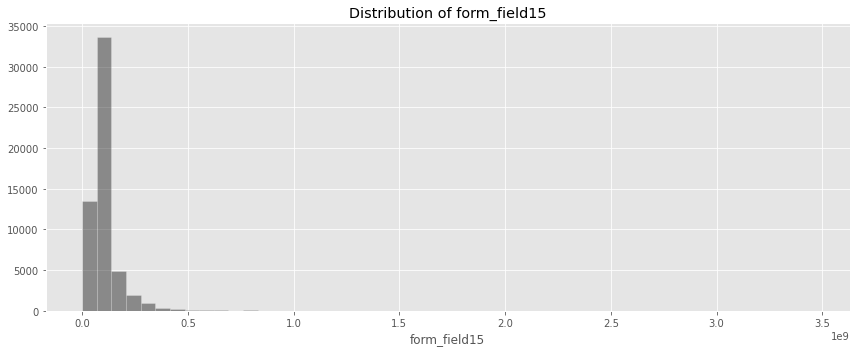

count    56000.000000
mean         0.230425
std          0.544667
min          0.000000
25%          0.000000
50%          0.000000
75%          0.230425
max         11.000000
Name: form_field16, dtype: float64


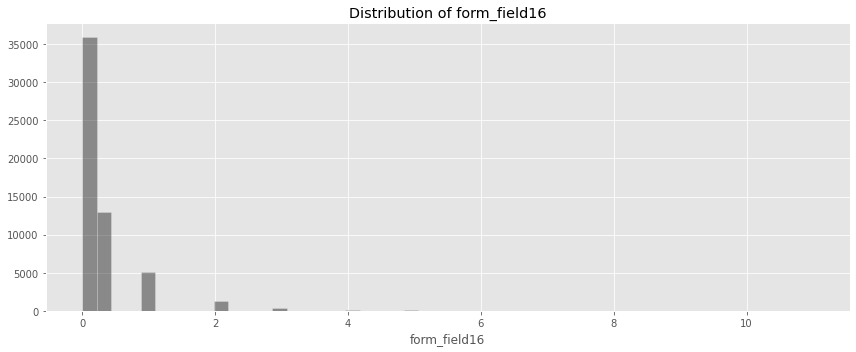

count    56000.000000
mean         0.265692
std          0.644516
min          0.000000
25%          0.000000
50%          0.000000
75%          0.265692
max         21.000000
Name: form_field17, dtype: float64


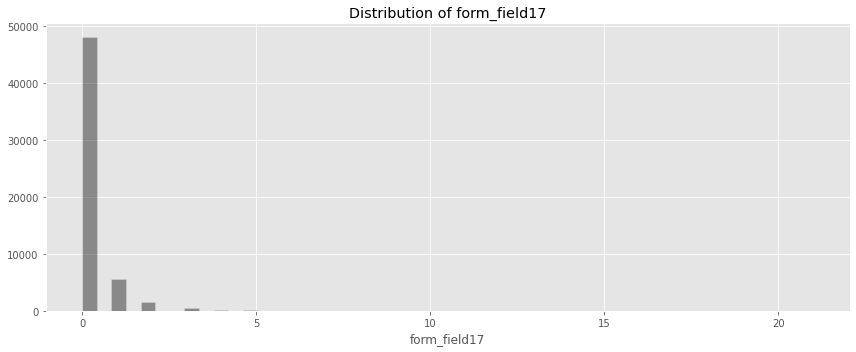

count    56000.000000
mean         0.271832
std          0.654600
min          0.000000
25%          0.000000
50%          0.000000
75%          0.271832
max         21.000000
Name: form_field18, dtype: float64


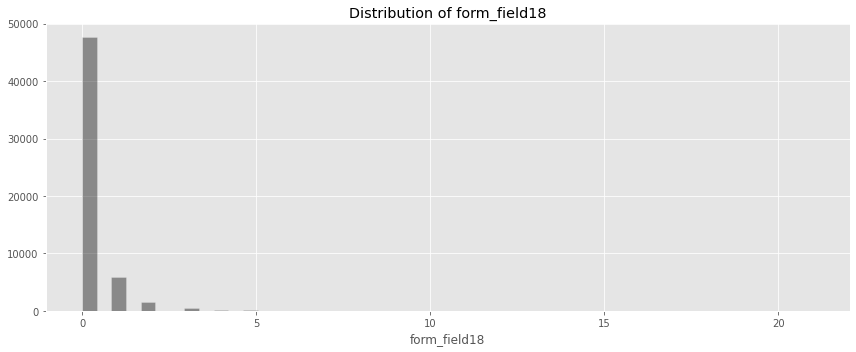

count    56000.000000
mean         0.948800
std          1.736392
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         28.000000
Name: form_field19, dtype: float64


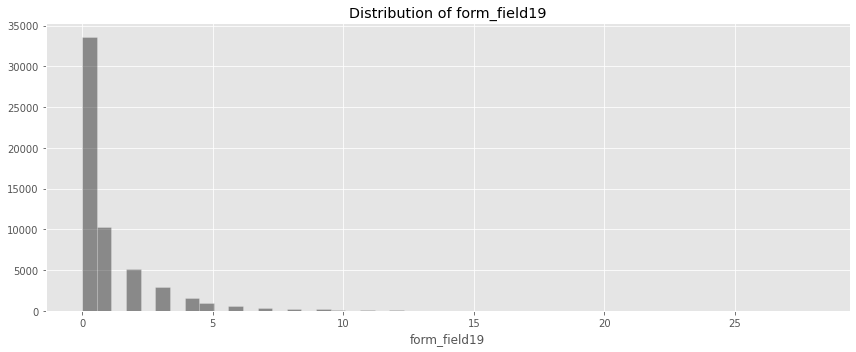

count    56000.000000
mean         1.031593
std          1.779454
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         29.000000
Name: form_field20, dtype: float64


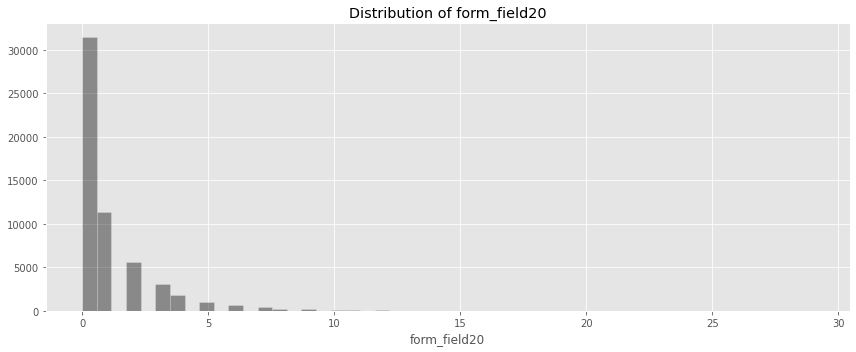

count    56000.000000
mean        86.500380
std         45.251916
min          0.255000
25%         60.015000
50%         86.500380
75%        115.290000
max       1957.875000
Name: form_field21, dtype: float64


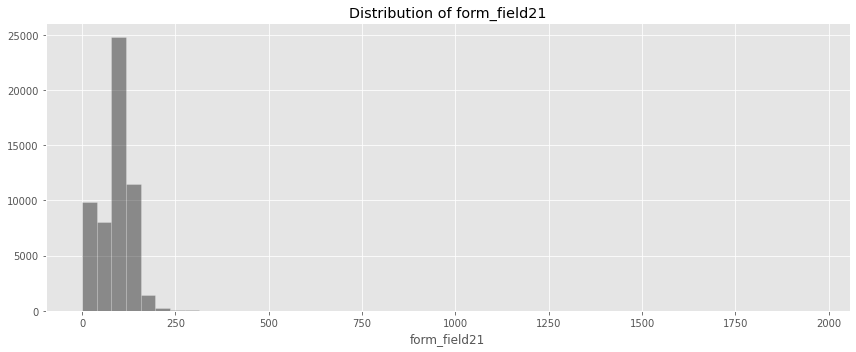

count    56000.000000
mean      6628.316381
std       4513.635321
min          0.000000
25%       3733.413750
50%       6628.316381
75%       8220.101250
max      97200.000000
Name: form_field22, dtype: float64


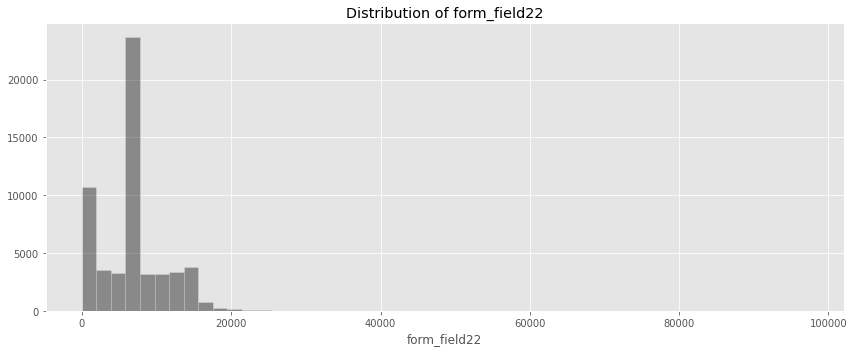

count    56000.000000
mean      6452.875072
std       4049.809753
min          0.000000
25%       5596.440000
50%       6452.875072
75%       6452.875072
max      97200.000000
Name: form_field23, dtype: float64


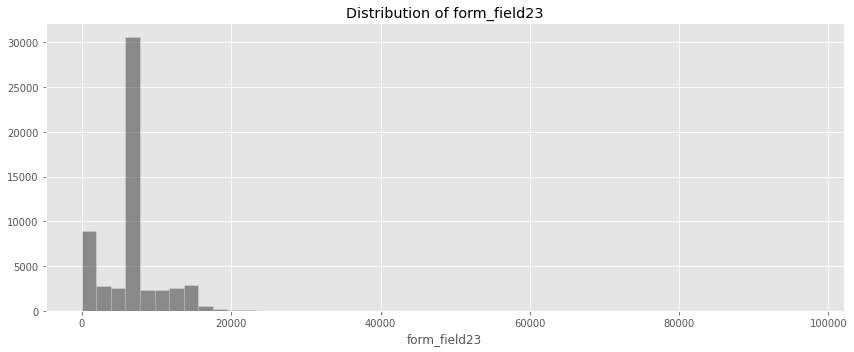

count    56000.000000
mean       104.558516
std        381.318647
min          0.000000
25%         26.936250
50%         93.300000
75%        104.558516
max      31863.750000
Name: form_field24, dtype: float64


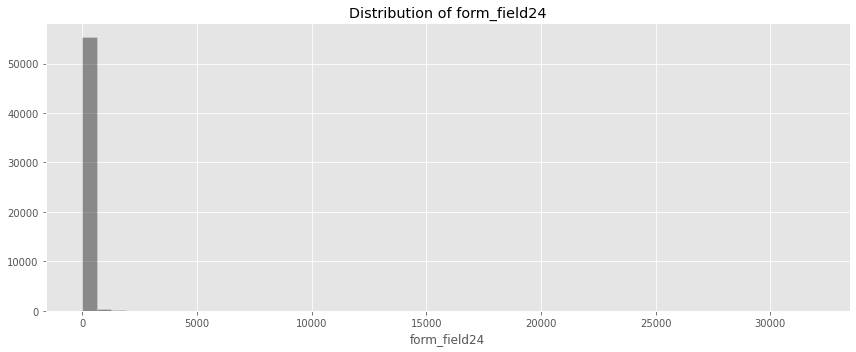

count    56000.000000
mean      2624.555935
std       1866.198023
min          0.000000
25%       1336.500000
50%       2443.500000
75%       3330.000000
max      25093.500000
Name: form_field25, dtype: float64


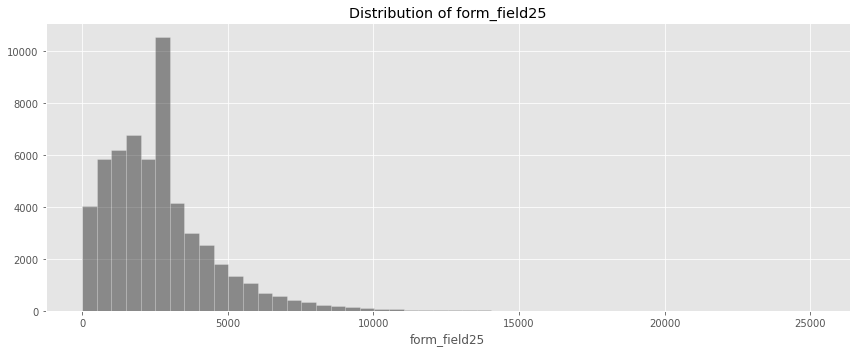

count    56000.000000
mean     10106.554899
std       8191.477133
min          0.000000
25%       3924.000000
50%       9582.000000
75%      12774.000000
max      73275.000000
Name: form_field26, dtype: float64


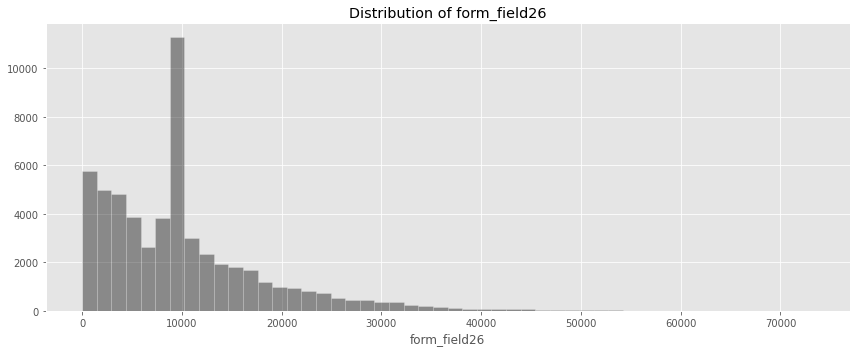

count    56000.000000
mean      6190.516948
std       4923.011116
min          0.000000
25%       2556.000000
50%       6190.516948
75%       7666.000000
max      42522.000000
Name: form_field27, dtype: float64


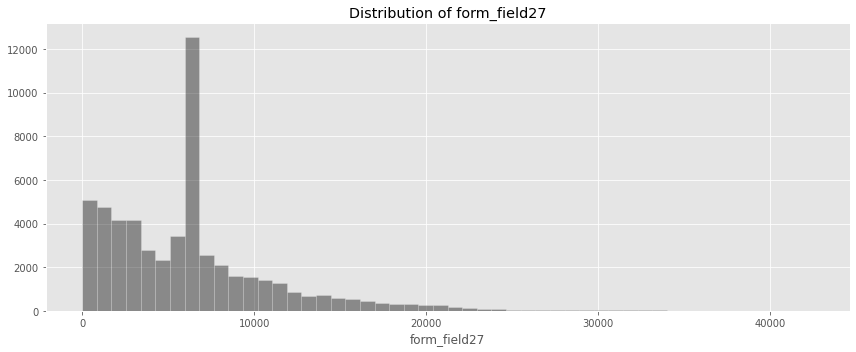

count    56000.000000
mean     17274.315141
std      26845.243944
min          0.000000
25%         60.000000
50%        486.000000
75%      60772.000000
max      60772.000000
Name: form_field28, dtype: float64


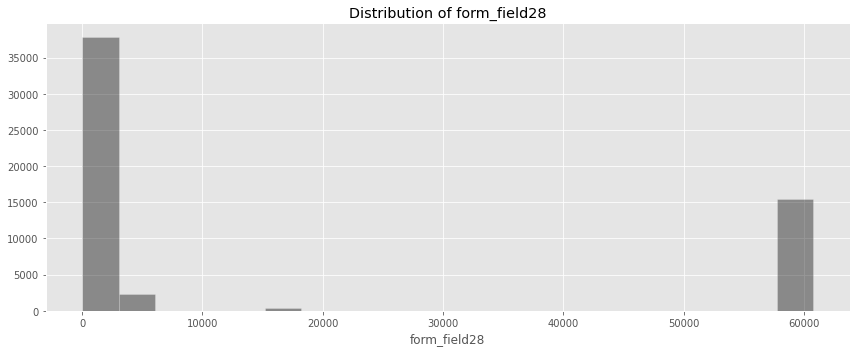

count    56000.000000
mean     16518.540695
std       9635.496351
min          0.000000
25%       9855.000000
50%      15147.000000
75%      21717.000000
max      73914.000000
Name: form_field29, dtype: float64


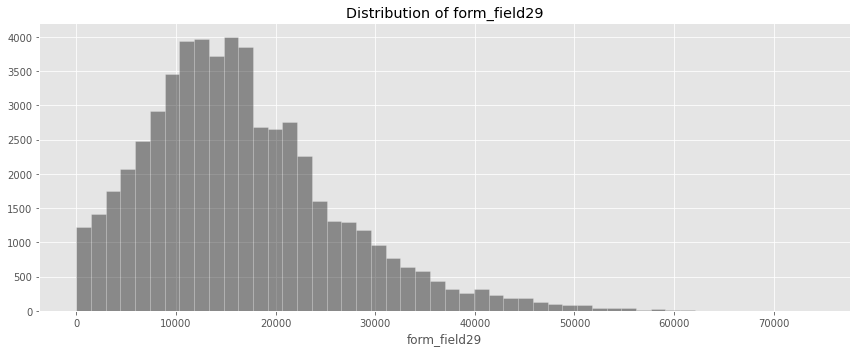

count    56000.000000
mean      5213.246663
std       2305.514841
min          0.000000
25%       5170.000000
50%       5213.246663
75%       6022.000000
max      25550.000000
Name: form_field30, dtype: float64


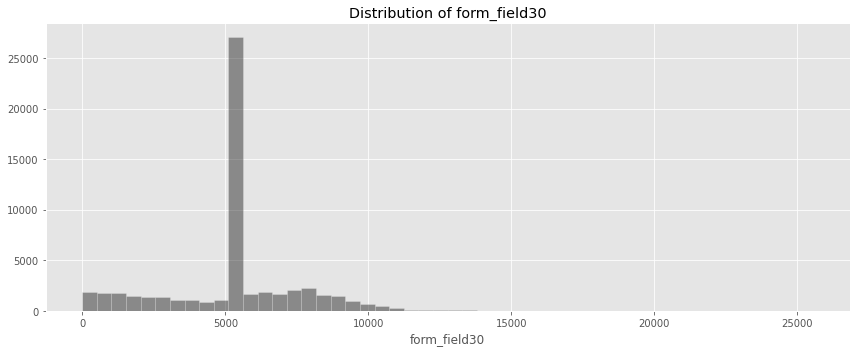

count    56000.000000
mean     10857.565755
std       3292.899230
min          0.000000
25%      10857.565755
50%      10857.565755
75%      10857.565755
max      47085.000000
Name: form_field31, dtype: float64


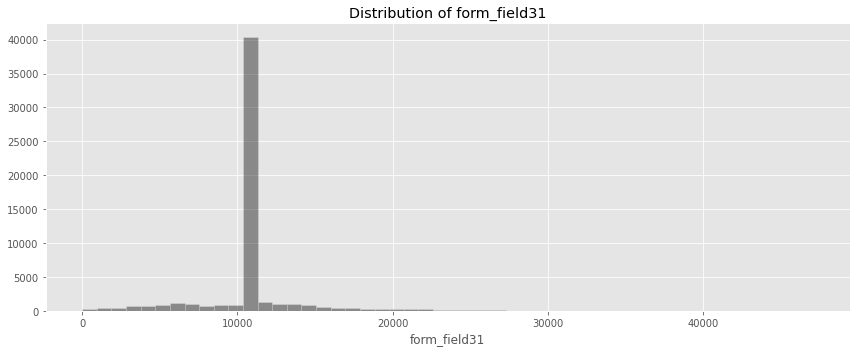

count    56000.000000
mean       938.345321
std        992.464408
min          0.000000
25%        226.000000
50%        716.000000
75%       1230.000000
max      21306.000000
Name: form_field32, dtype: float64


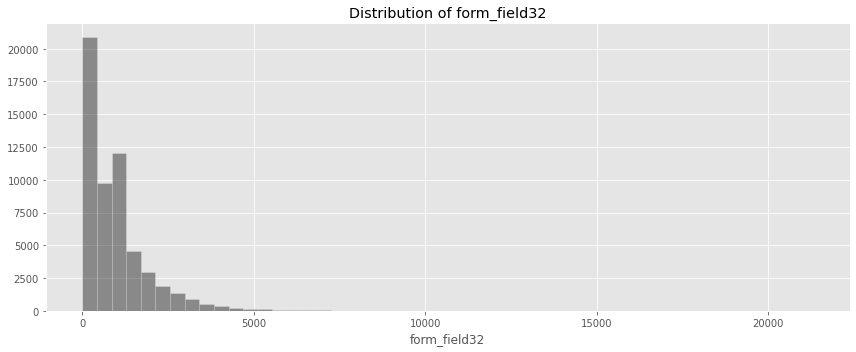

count    56000.000000
mean        13.926583
std         15.036874
min          0.166600
25%          2.500000
50%          8.166600
75%         20.833400
max        152.000000
Name: form_field33, dtype: float64


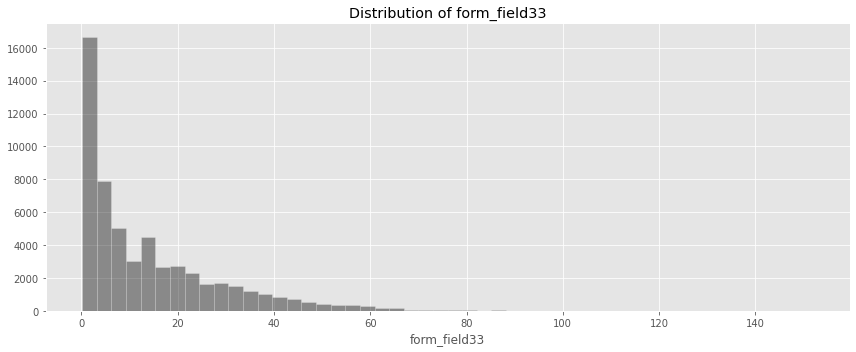

count    56000.000000
mean         0.230245
std          0.680894
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: form_field34, dtype: float64


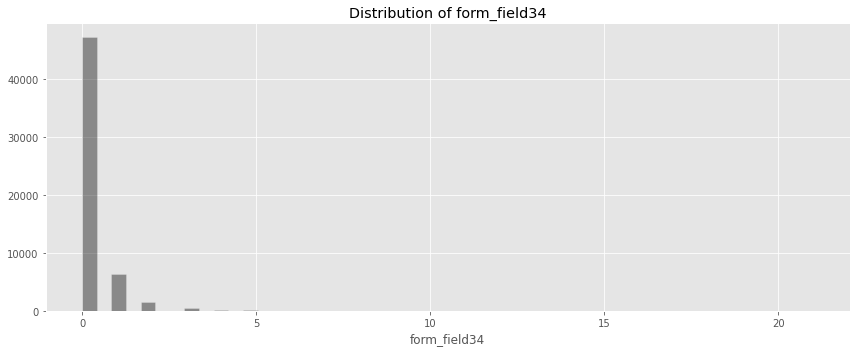

count    56000.000000
mean         0.199866
std          0.439640
min          0.000000
25%          0.000000
50%          0.000000
75%          0.199866
max         10.000000
Name: form_field35, dtype: float64


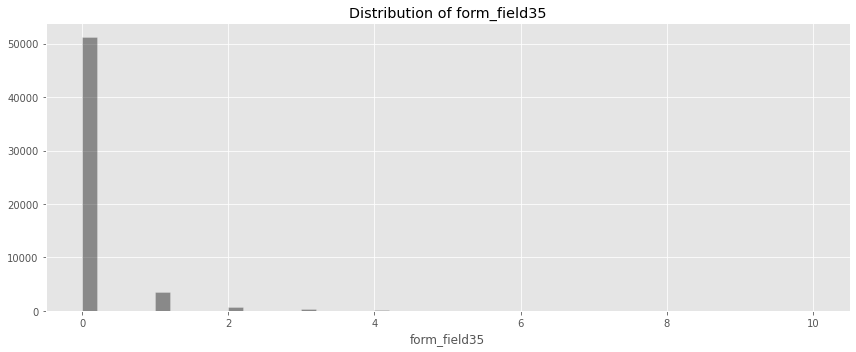

count    56000.000000
mean        12.859069
std         10.431060
min          2.000000
25%          6.000000
50%         10.000000
75%         16.000000
max        200.000000
Name: form_field36, dtype: float64


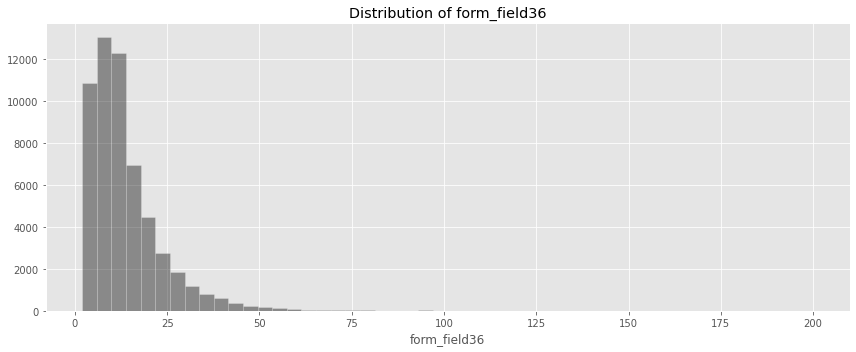

count    56000.000000
mean         8.480435
std          8.863237
min          0.000000
25%          2.000000
50%          8.000000
75%         12.000000
max        106.000000
Name: form_field37, dtype: float64


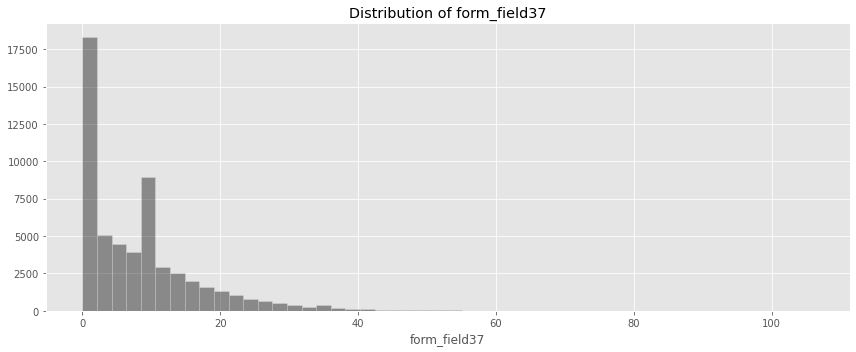

count    56000.000000
mean         8.601420
std          7.943915
min          0.000000
25%          4.000000
50%          6.000000
75%         12.000000
max        156.000000
Name: form_field38, dtype: float64


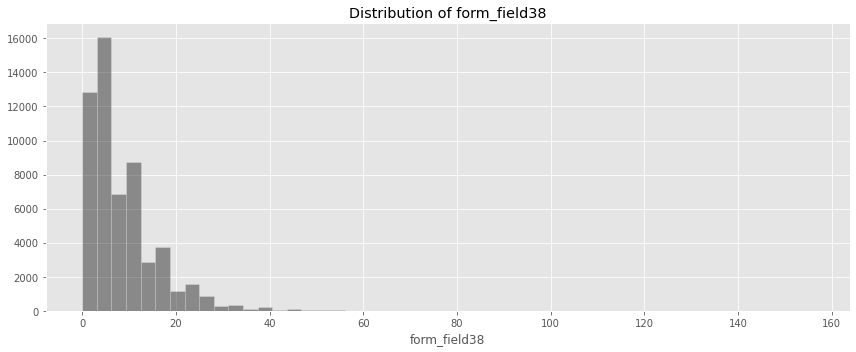

count    56000.000000
mean         0.090849
std          0.407556
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: form_field39, dtype: float64


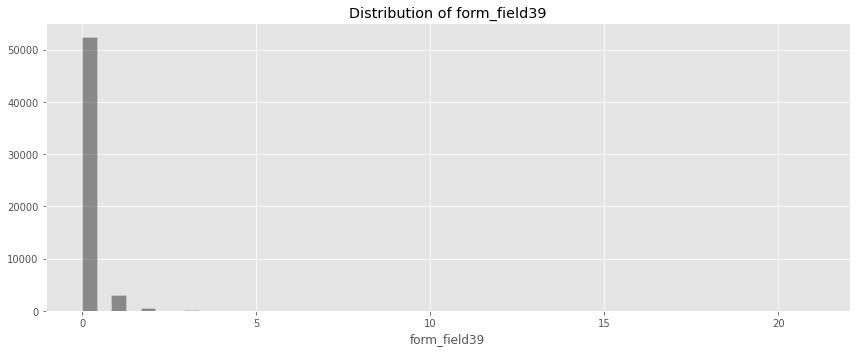

count    56000.000000
mean       147.797977
std         21.104389
min          0.021000
25%        147.797977
50%        147.797977
75%        147.797977
max        645.450000
Name: form_field40, dtype: float64


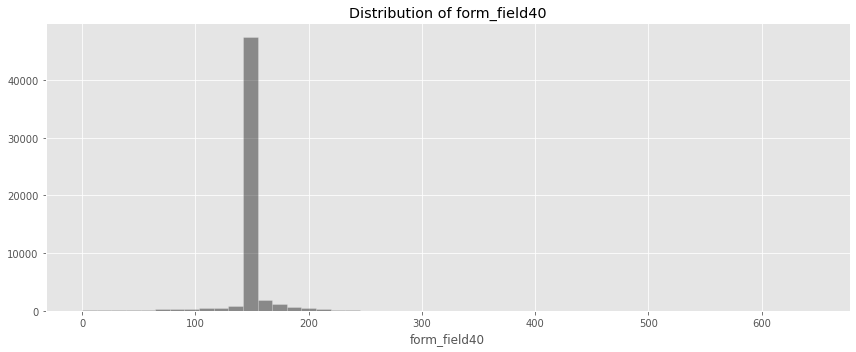

count    56000.000000
mean       108.117363
std         20.710817
min          0.000000
25%        108.117363
50%        108.117363
75%        108.117363
max        255.000000
Name: form_field41, dtype: float64


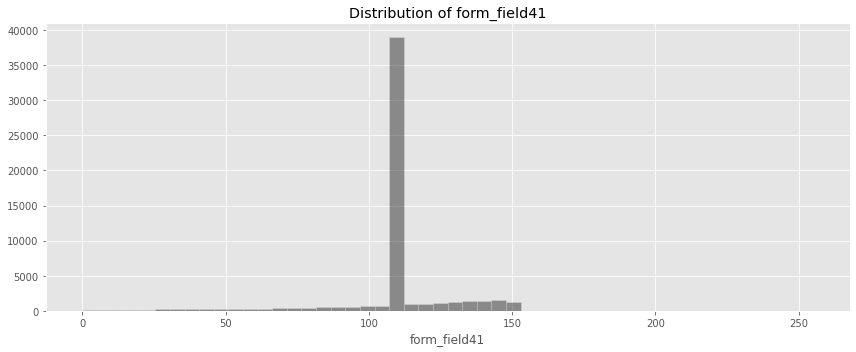

count    56000.000000
mean         0.368215
std          0.407952
min          0.000000
25%          0.000000
50%          0.239129
75%          0.611116
max          2.200000
Name: form_field42, dtype: float64


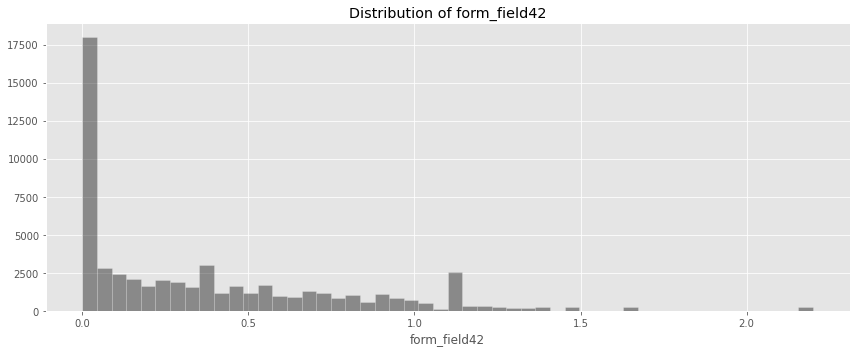

count    56000.000000
mean         6.634511
std          6.346513
min          0.000000
25%          2.020000
50%          5.050000
75%         10.100000
max         91.910000
Name: form_field43, dtype: float64


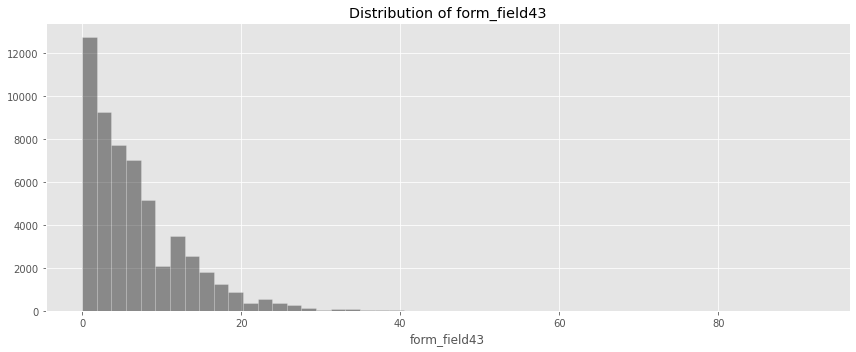

count    56000.000000
mean         0.563377
std          0.187267
min          0.048528
25%          0.428256
50%          0.563377
75%          0.739474
max          0.800000
Name: form_field44, dtype: float64


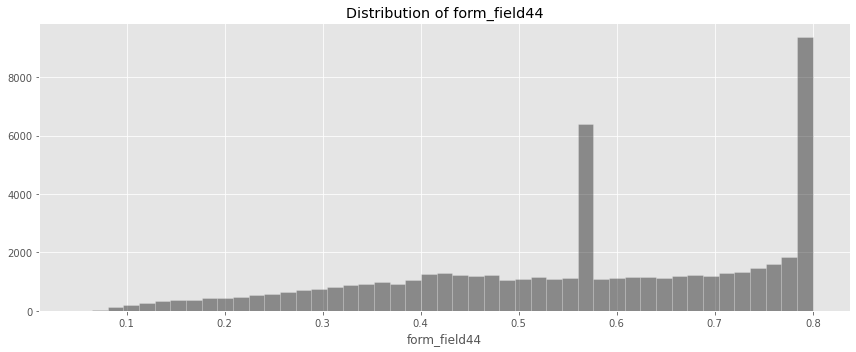

count    56000.00000
mean         0.07252
std          0.19329
min          0.00000
25%          0.00000
50%          0.07252
75%          0.07252
max          5.00000
Name: form_field45, dtype: float64


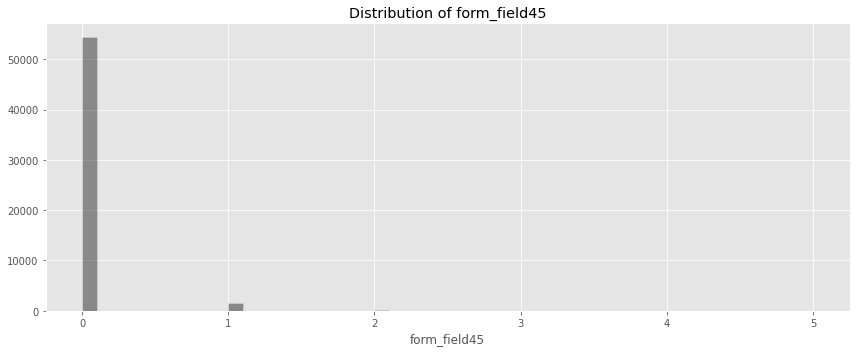

count    56000.000000
mean         0.095371
std          0.283643
min          0.000000
25%          0.000000
50%          0.000000
75%          0.095371
max          5.000000
Name: form_field46, dtype: float64


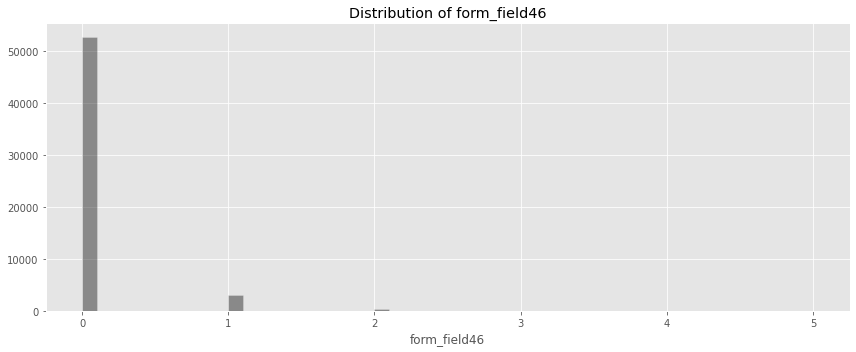

count    5.600000e+04
mean     3.052449e+05
std      1.304724e+06
min      0.000000e+00
25%      1.939907e+02
50%      1.765369e+03
75%      3.052449e+05
max      5.321014e+07
Name: form_field48, dtype: float64


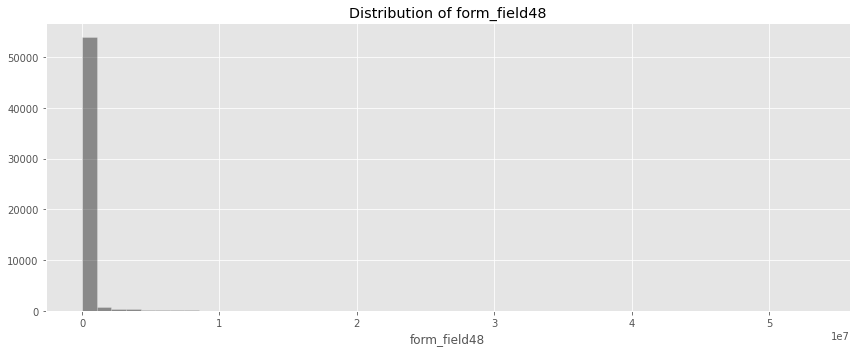

count    56000.000000
mean         1.049061
std          1.800426
min          0.000000
25%          0.000000
50%          0.000000
75%          1.158480
max         28.000000
Name: form_field49, dtype: float64


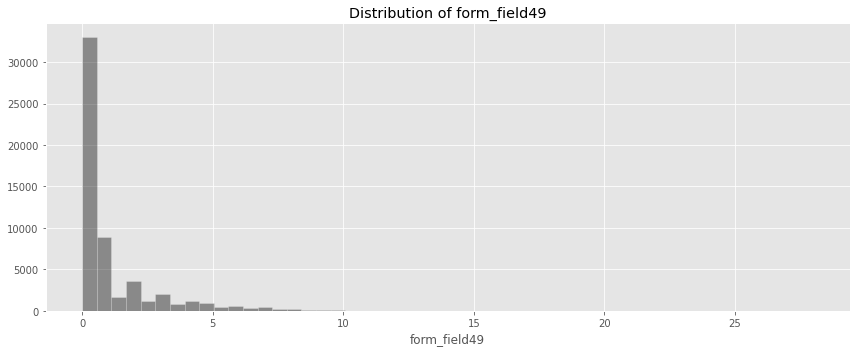

count    5.600000e+04
mean     6.005862e+05
std      5.233986e+06
min      0.000000e+00
25%      6.719678e-02
50%      2.874487e-01
75%      1.752136e+00
max      2.307571e+08
Name: form_field50, dtype: float64


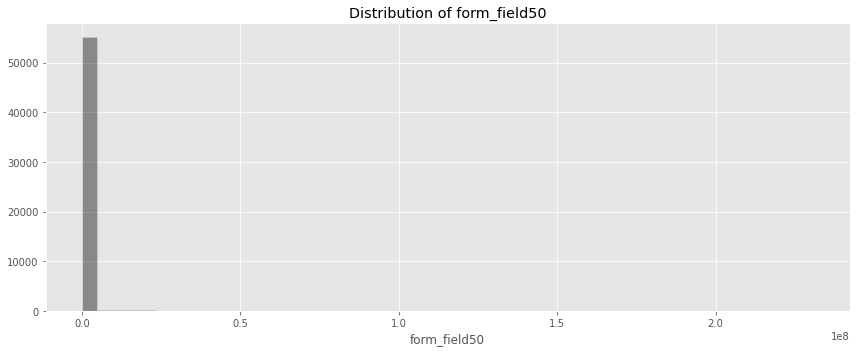

In [103]:
## Checking numerical distribution plots for all numeric columns

numeric_dist_plot(train_set)

form_field47
charge :  64.95178571428572 %
lending :  35.04821428571429 %


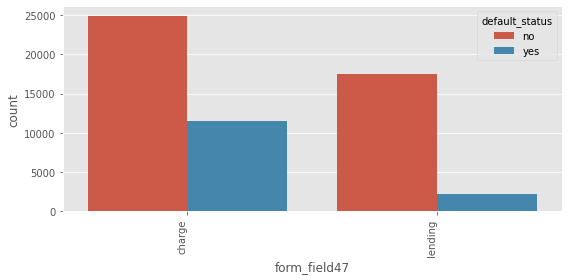

default_status
no :  75.50892857142857 %
yes :  24.491071428571427 %


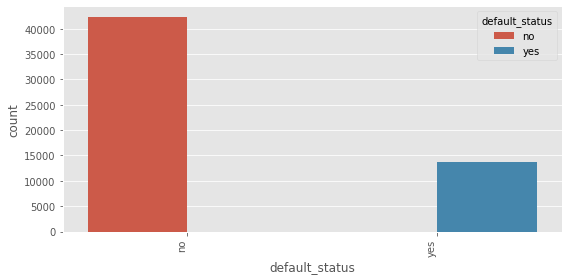

In [11]:
## checking object count plot for columns with object dtype

object_count_plot(train_set,hue='default_status')

# Fearure Engineering

Now we will create Three datasets: main_df, bin_df and WOE_df.

main_df: This is the dataset just as it is.

bin_df: Here the dataset has been binned according to 20 diffrent bins.

WOE_df: This is the a dataset that contains the Weight od evidence values for each data point.


Each dataset would be split into Three: Train, Test and Validation. This is necessary because stacking woul dbe employed for model improvement.

In [109]:
# building a class that binns columns

class BinningClass():
    """
    This class takes in a pandas dataframe and bins it.
    """
    
    import pandas as pd
    import numpy as np
    
    def __init__(self,df):
        self.data = df
        self.quantiles = [round(0.05*i, 2) for i in range(21)]
        self.labels = 'None'
        self.column = 'None'
        self.quantl = self.data.quantile(self.quantiles,axis=0)
        
    def bin_col(self,col,bins=20,custom=False,**args):
        self.column = col
            
        if custom==False:
            self.bins=bins
            self.step =1/self.bins
            self.quantiles = [round(self.step*i, 2) for i in range(self.bins+1)]

            #defining bin labels
            self.labels = [i for i in range(1,self.bins+1)]

            #define quantile dataframe
            self.quantl = self.data.quantile(self.quantiles,axis=0)

            #binning
            binned = pd.cut(self.data[self.column],bins=self.quantl[self.column],
                            labels=self.labels,duplicates='drop',include_lowest=True)
            return binned
        
        else:
            self.quantiles = args['quantiles']
            self.labels = args['labels']
            self.quantl = self.data.quantile(self.quantiles,axis=0)
            
            #binning
            binned = pd.cut(self.data[self.column],bins=self.quantl[self.column],
                            labels=self.labels,duplicates='drop',include_lowest=True)
            return binned

In [111]:
### creating main df
main_df_train = train_set.copy()

### creating bin_df
#creating a quantile dataframe
bc = BinningClass(train_set)
quantile_df = bc.quantl

#initializing bin_df
bin_df = train_set.copy()

#replacing values in bin_df with respective bins
for i in quantile_df.columns:
    #creating a sorted list of quantiles with unique values
    quantile_sorted = sorted(list(set(quantile_df[i])))
    
    quantiles_ = [] #initializing quantile list
    #filling quantiles_ with the respectibe quantiles
    for j in quantile_sorted:
        quantiles_.append(quantile_df[quantile_df[i]==j].index[0])
   
    #initializing the bin_class
    bin_class = BinningClass(bin_df)
    
    #creating labels
    labels = list(quantile_df[i]) 
    pre_defined_labels =  [labels.index(k)+1 for k in quantile_sorted ]
    sorted_labels = sorted(pre_defined_labels)
    del sorted_labels[len(sorted_labels)-1]
    main_labels = sorted_labels
    
    #binning
    bin_df[i] = bin_class.bin_col(col=i,bins=len(main_labels),custom=True,
                                  quantiles=quantiles_,labels=main_labels)
    
### ensuring all dtypes in bin_df are nunmeric and encoding categorical columns
dic = {'charge':1,'lending':0}
bin_df['form_field47'] = bin_df['form_field47'].map(dic)
dic2 = {'yes':1,'no':0}
bin_df['default_status'] = bin_df['default_status'].map(dic2)

### creating WOE_df
WOE_df = bin_df.copy()
for i in WOE_df.drop('default_status',axis=1).columns:
    prob_df = WOE_df.groupby(i)['default_status'].mean()
    prob_df = pd.DataFrame(prob_df)
    prob_df['no_default'] = 1-prob_df['default_status']
    prob_df['WoE'] = np.log(prob_df['default_status']/prob_df['no_default'])
    WOE_dict = prob_df['WoE'].to_dict()
    WOE_df[i] = WOE_df[i].map(WOE_dict)
    
prob_df=0 #clearing prob df

In [112]:
### Encoding categorical columns in main_df_train
main_df_train['default_status'] = main_df_train['default_status'].map({'yes':1,'no':0})
main_df_train['form_field47'] = main_df_train['form_field47'].map({'charge':1,'lending':0})

## ensuring column names are diffrent
bin_df.columns = [i+'_bin' for i in bin_df.columns]
WOE_df.columns = [i+'_WOE' for i in WOE_df.columns]

In [113]:
main_df_train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.000000,10689720.0,2.520720e+05,4272776.0,11333126.0,4.397256e+06,2.301324e+06,7875694.0,96375139,112181765.0,1.000000,1.000000,1.000000,3.0,3.0,134.65500,6628.316381,6452.875072,134.655000,4000.5,17064.0,11376.0,60.0,17064.0,5962.000000,10857.565755,1052.0,8.0000,2.0,0.199866,12.0,12.0,4.0,0.0,147.797977,108.117363,0.392854,2.02,0.711632,0.00000,0.0,1,305244.932775,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.000000,898979.0,4.975310e+05,9073814.0,2533168.0,2.442920e+05,3.982971e+06,2141445.0,28141427,45169902.0,1.000000,1.000000,1.000000,2.0,2.0,109.23000,11385.240000,14584.290000,86.685000,4161.0,13413.0,8942.0,304.0,13413.0,5780.000000,10857.565755,2554.0,17.5000,0.0,0.000000,16.0,24.0,8.0,0.0,147.797977,108.117363,0.314281,8.08,0.183584,0.07252,0.0,1,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,624447.924437,956940.0,2.626690e+06,192944.0,1079864.0,2.054715e+06,2.771113e+06,0.0,16576457,22452691.0,0.230425,0.265692,0.271832,0.0,0.0,86.50038,6628.316381,6452.875072,104.558516,1597.5,4746.0,3164.0,60.0,15696.0,5213.246663,14508.000000,70.0,0.6666,0.0,0.199866,12.0,0.0,6.0,0.0,149.680500,108.117363,0.162965,18.18,0.791136,0.00000,0.0,1,305244.932775,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.000000,3044703.0,3.854990e+05,3986472.0,3621979.0,2.054715e+06,7.717760e+05,1186839.0,48187375,136297820.0,0.000000,0.000000,0.000000,1.0,1.0,120.12000,8580.000000,0.000000,85.800000,1701.0,4014.0,2676.0,60.0,11679.0,5213.246663,10857.565755,522.0,7.8334,1.0,1.000000,4.0,8.0,4.0,1.0,147.797977,108.117363,0.488884,2.02,0.685168,0.07252,0.0,1,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.000000,214728.0,2.147280e+05,1284089.0,361770.0,3.963910e+05,8.184560e+05,511535.0,28141427,15292757.0,0.000000,0.000000,0.000000,3.0,3.0,104.53500,8360.190000,10326.450000,115.335000,1551.0,3285.0,2190.0,60.0,19437.0,12958.000000,5202.000000,272.0,1.0000,0.0,0.000000,24.0,2.0,24.0,0.0,150.013500,108.117363,0.275000,12.12,0.438168,0.00000,0.0,1,97.887502,1.427891,0.045630,0


In [114]:
bin_df.head()

,form_field1_bin,form_field2_bin,form_field3_bin,form_field4_bin,form_field5_bin,form_field6_bin,form_field7_bin,form_field8_bin,form_field9_bin,form_field10_bin,form_field11_bin,form_field12_bin,form_field13_bin,form_field14_bin,form_field15_bin,form_field16_bin,form_field17_bin,form_field18_bin,form_field19_bin,form_field20_bin,form_field21_bin,form_field22_bin,form_field23_bin,form_field24_bin,form_field25_bin,form_field26_bin,form_field27_bin,form_field28_bin,form_field29_bin,form_field30_bin,form_field31_bin,form_field32_bin,form_field33_bin,form_field34_bin,form_field35_bin,form_field36_bin,form_field37_bin,form_field38_bin,form_field39_bin,form_field40_bin,form_field41_bin,form_field42_bin,form_field43_bin,form_field44_bin,form_field45_bin,form_field46_bin,form_field47_bin,form_field48_bin,form_field49_bin,form_field50_bin,default_status_bin
0,8,10,17,1,1,1,18,5,8,15,20,11,17,19,8,15,15,15,17,17,17,7,6,18,17,17,18,1,12,7,4,15,10,18,12,10,15,3,1,2,3,13,4,15,1,1,1,12,15,4,0
1,9,15,12,1,1,1,6,6,11,9,3,17,10,10,3,15,15,15,14,13,15,17,20,10,17,16,17,10,9,7,4,19,14,1,1,14,19,9,1,2,3,12,14,1,1,1,1,7,16,11,0
2,3,13,18,1,19,12,6,11,1,7,8,12,1,4,1,14,1,1,1,1,7,7,6,11,7,6,7,1,11,6,19,3,2,1,12,10,1,6,1,3,3,9,19,18,1,1,1,12,16,2,1
3,6,8,13,1,1,9,10,6,8,10,8,7,8,15,17,1,1,1,13,1,16,16,1,10,7,6,6,1,7,6,4,9,10,1,17,1,10,3,19,2,3,14,4,14,1,1,1,4,13,6,0
4,6,16,15,1,1,1,3,5,5,5,4,7,6,10,1,1,1,1,17,17,15,16,18,17,6,5,5,1,14,20,2,6,3,1,1,18,1,19,1,3,3,11,17,6,1,1,1,4,16,5,0


In [115]:
WOE_df.head()

,form_field1_WOE,form_field2_WOE,form_field3_WOE,form_field4_WOE,form_field5_WOE,form_field6_WOE,form_field7_WOE,form_field8_WOE,form_field9_WOE,form_field10_WOE,form_field11_WOE,form_field12_WOE,form_field13_WOE,form_field14_WOE,form_field15_WOE,form_field16_WOE,form_field17_WOE,form_field18_WOE,form_field19_WOE,form_field20_WOE,form_field21_WOE,form_field22_WOE,form_field23_WOE,form_field24_WOE,form_field25_WOE,form_field26_WOE,form_field27_WOE,form_field28_WOE,form_field29_WOE,form_field30_WOE,form_field31_WOE,form_field32_WOE,form_field33_WOE,form_field34_WOE,form_field35_WOE,form_field36_WOE,form_field37_WOE,form_field38_WOE,form_field39_WOE,form_field40_WOE,form_field41_WOE,form_field42_WOE,form_field43_WOE,form_field44_WOE,form_field45_WOE,form_field46_WOE,form_field47_WOE,form_field48_WOE,form_field49_WOE,form_field50_WOE,default_status_WOE
0,-0.953378,-1.118310,-0.304184,-1.263381,-1.247605,-0.301144,-2.388996,-1.144649,-1.271921,-1.753926,-0.278937,-1.540734,-2.058321,-1.671912,-1.575721,-0.461258,-0.500932,-0.527377,-0.704162,-0.763800,-0.923781,-0.916912,-1.035395,-0.636413,-2.113619,-2.143199,-2.180880,-0.390380,-1.382549,-1.255181,-1.293951,-1.809740,-1.086942,-0.031962,-1.040022,-1.105986,-1.924462,-1.403846,-1.217184,-1.263491,-1.101571,-1.139648,-0.874827,-1.647637,-1.143437,-1.217757,-0.768005,-0.935930,-0.645432,-0.743941,0
1,-1.097243,-0.817657,-0.921547,-1.263381,-1.247605,-0.301144,-0.953631,-1.324818,-1.751828,-0.981975,-0.651086,-1.605155,-1.376495,-0.875004,-0.968737,-0.461258,-0.500932,-0.527377,-0.883358,-0.957663,-1.273292,-0.960462,0.126643,-1.291274,-2.113619,-1.951624,-2.102311,-1.288375,-1.007366,-1.255181,-1.293951,-2.415137,-1.297601,-1.186126,-1.471457,-0.887042,-2.172675,-1.055846,-1.217184,-1.263491,-1.101571,-1.049069,-1.653890,-0.549108,-1.143437,-1.217757,-0.768005,-1.355332,-0.509682,-1.780141,0
2,-0.033804,-1.507932,-0.327173,-1.263381,-0.297060,-0.578516,-0.953631,-0.506964,-0.359851,-0.849509,-1.796110,-0.383845,-0.537624,-0.722121,-0.492581,-0.374999,-1.300008,-1.301697,-1.333092,-1.273039,-0.735093,-0.916912,-1.035395,-0.482086,-1.028341,-0.796652,-0.891033,-0.390380,-1.228171,-0.989344,-1.068105,-0.466588,-0.642750,-1.186126,-1.040022,-1.105986,-0.602550,-1.196093,-1.217184,-0.414270,-1.101571,-1.409489,-1.620722,-1.020141,-1.143437,-1.217757,-0.768005,-0.935930,-0.509682,-0.442811,1
3,-0.898410,-1.317423,-0.713589,-1.263381,-1.247605,-2.023637,-1.496672,-1.324818,-1.271921,-1.120180,-1.796110,-1.324365,-1.081518,-1.301558,-1.558901,-1.748514,-1.300008,-1.301697,-1.103962,-1.273039,-1.149385,-1.115829,-2.211389,-1.291274,-1.028341,-0.796652,-0.851452,-0.390380,-0.820021,-0.989344,-1.293951,-1.343286,-1.086942,-1.186126,-0.099523,-1.595231,-1.697455,-1.403846,-0.158782,-1.263491,-1.101571,-0.947303,-0.874827,-1.475742,-1.143437,-1.217757,-0.768005,-0.912793,-0.740145,-1.108159,0
4,-0.898410,-0.686193,-0.691542,-1.263381,-1.247605,-0.301144,-0.606412,-1.144649,-0.914541,-0.526960,-0.532217,-1.324365,-0.790226,-0.875004,-0.492581,-1.748514,-1.300008,-1.301697,-0.704162,-0.763800,-1.273292,-1.115829,-0.857523,-0.826458,-1.010522,-0.795729,-0.849668,-0.390380,-1.549904,-1.700953,-0.491330,-0.919856,-0.740570,-1.186126,-1.471457,-0.640132,-0.602550,-0.554480,-1.217184,-0.414270,-1.101571,-1.192027,-1.694996,-1.215932,-1.143437,-1.217757,-0.768005,-0.912793,-0.509682,-0.902332,0


In [116]:
### Creating a new datasets by combining various datasets 
main_bin_df = pd.concat([main_df_train,bin_df.drop('default_status_bin',axis=1)],axis=1)   # main_df_train+ bin_df

In [117]:
main_bin_df.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,form_field1_bin,form_field2_bin,form_field3_bin,form_field4_bin,form_field5_bin,form_field6_bin,form_field7_bin,form_field8_bin,form_field9_bin,form_field10_bin,form_field11_bin,form_field12_bin,form_field13_bin,form_field14_bin,form_field15_bin,form_field16_bin,form_field17_bin,form_field18_bin,form_field19_bin,form_field20_bin,form_field21_bin,form_field22_bin,form_field23_bin,form_field24_bin,form_field25_bin,form_field26_bin,form_field27_bin,form_field28_bin,form_field29_bin,form_field30_bin,form_field31_bin,form_field32_bin,form_field33_bin,form_field34_bin,form_field35_bin,form_field36_bin,form_field37_bin,form_field38_bin,form_field39_bin,form_field40_bin,form_field41_bin,form_field42_bin,form_field43_bin,form_field44_bin,form_field45_bin,form_field46_bin,form_field47_bin,form_field48_bin,form_field49_bin,form_field50_bin
0,3436.0,0.28505,1.6560,0.0,0.000,0.000000,10689720.0,2.520720e+05,4272776.0,11333126.0,4.397256e+06,2.301324e+06,7875694.0,96375139,112181765.0,1.000000,1.000000,1.000000,3.0,3.0,134.65500,6628.316381,6452.875072,134.655000,4000.5,17064.0,11376.0,60.0,17064.0,5962.000000,10857.565755,1052.0,8.0000,2.0,0.199866,12.0,12.0,4.0,0.0,147.797977,108.117363,0.392854,2.02,0.711632,0.00000,0.0,1,305244.932775,1.129518,0.044335,0,8,10,17,1,1,1,18,5,8,15,20,11,17,19,8,15,15,15,17,17,17,7,6,18,17,17,18,1,12,7,4,15,10,18,12,10,15,3,1,2,3,13,4,15,1,1,1,12,15,4
1,3456.0,0.67400,0.2342,0.0,0.000,0.000000,898979.0,4.975310e+05,9073814.0,2533168.0,2.442920e+05,3.982971e+06,2141445.0,28141427,45169902.0,1.000000,1.000000,1.000000,2.0,2.0,109.23000,11385.240000,14584.290000,86.685000,4161.0,13413.0,8942.0,304.0,13413.0,5780.000000,10857.565755,2554.0,17.5000,0.0,0.000000,16.0,24.0,8.0,0.0,147.797977,108.117363,0.314281,8.08,0.183584,0.07252,0.0,1,349.805730,1.620483,0.322436,0,9,15,12,1,1,1,6,6,11,9,3,17,10,10,3,15,15,15,14,13,15,17,20,10,17,16,17,10,9,7,4,19,14,1,1,14,19,9,1,2,3,12,14,1,1,1,1,7,16,11
2,3276.0,0.53845,3.1510,0.0,6.282,624447.924437,956940.0,2.626690e+06,192944.0,1079864.0,2.054715e+06,2.771113e+06,0.0,16576457,22452691.0,0.230425,0.265692,0.271832,0.0,0.0,86.50038,6628.316381,6452.875072,104.558516,1597.5,4746.0,3164.0,60.0,15696.0,5213.246663,14508.000000,70.0,0.6666,0.0,0.199866,12.0,0.0,6.0,0.0,149.680500,108.117363,0.162965,18.18,0.791136,0.00000,0.0,1,305244.932775,1.513370,0.011640,1,3,13,18,1,19,12,6,11,1,7,8,12,1,4,1,14,1,1,1,1,7,7,6,11,7,6,7,1,11,6,19,3,2,1,12,10,1,6,1,3,3,9,19,18,1,1,1,12,16,2
3,3372.0,0.17005,0.5050,0.0,0.000,192166.000000,3044703.0,3.854990e+05,3986472.0,3621979.0,2.054715e+06,7.717760e+05,1186839.0,48187375,136297820.0,0.000000,0.000000,0.000000,1.0,1.0,120.12000,8580.000000,0.000000,85.800000,1701.0,4014.0,2676.0,60.0,11679.0,5213.246663,10857.565755,522.0,7.8334,1.0,1.000000,4.0,8.0,4.0,1.0,147.797977,108.117363,0.488884,2.02,0.685168,0.07252,0.0,1,89.940100,0.664452,0.082729,0,6,8,13,1,1,9,10,6,8,10,8,7,8,15,17,1,1,1,13,1,16,16,1,10,7,6,6,1,7,6,4,9,10,1,17,1,10,3,19,2,3,14,4,14,1,1,1,4,13,6
4,3370.0,0.77270,1.1010,0.0,0.000,1556.000000,214728.0,2.147280e+05,1284089.0,361770.0,3.963910e+05,8.184560e+05,511535.0,28141427,15292757.0,0.000000,0.000000,0.000000,3.0,3.0,104.53500,8360.190000,10326.450000,115.335000,1551.0,3285.0,2190.0,60.0,19437.0,12958.000000,5202.000000,272.0,1.0000,0.0,0.000000,24.0,2.0,24.0,0.0,150.013500,108.117

In [118]:
### Splitting the datasets into train, test and validation

def splitter(data_list, proportion=[0.6,0.8]):
    """
    This function shuffles dataframes and splits the dataframe into three accordingly
    
    Args: 
        data_list: A list of dataframnes with exactly equal lenghts
        proportion: here you define the splitting proportion for train, test and validation respectively
        
    returns:
        Returns a list.
    """
    
    experiment_df = data_list[0].copy()    # creating a reference df for splittting the indices
    experiment_df = experiment_df.sample(frac = 1,random_state=1)    # shuffling the reference sample
    train_, validate_, test_ = np.split(experiment_df.sample(frac=1),
                                        [int(proportion[0]*len(experiment_df)),
                                         int(proportion[1]*len(experiment_df))])    ###splitting into train,test and validate datasets 
                                                                                      # the indices of these would be used to split the datasets in data_list  

    data=[]

    for i in data_list:
        train = i.loc[train_.index,:]
        test = i.loc[test_.index,:]
        validation = i.loc[validate_.index,:]

        data.append([train,test,validation])
        
    return data

In [119]:
### Splitting all generated datasets into train, test and validation
split_datasets = splitter([main_df_train,bin_df,WOE_df,main_bin_df,
                           main_WOE_df,WOE_bin_df,main_bin_WOE_df])

main_df_train_split = split_datasets[0]
bin_df_split = split_datasets[1]
WOE_df_split = split_datasets[2]
main_bin_df_split = split_datasets[3]

# Building the models

In [120]:
##CATBOOST CLASSIFIER 

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

xc = main_df_train_split[0].copy()
xv = main_df_train_split[1].copy()
y_train = xc['default_status']
y_validation = xv['default_status']

params = {
    'iterations': 700,
    'learning_rate': 0.01,
    'eval_metric': 'Accuracy',
    'logging_level': 'Silent',
    'use_best_model': True,
    #'l2_leaf_reg':3,
     #'n_estimators':5000
    'depth':8,
    #'loss_function': 'CrossEntropy'
    'l2_leaf_reg':1
}


catboost_model2 = CatBoostClassifier(**params)
train_pool = Pool(xc.drop('default_status', axis=1), y_train)
validate_pool = Pool(xv.drop('default_status', axis=1), y_validation)

catboost_model2.fit(train_pool, eval_set=validate_pool)

pred_prob_test = catboost_model2.predict_proba(xv.drop('default_status', axis=1))
pred_prob_train = catboost_model2.predict_proba(xc.drop('default_status', axis=1))
cb = catboost_model2.predict_proba(main_df_train.drop('default_status', axis=1))[:,1]
#cb2 = catboost_model2.predict_proba(main_bin_df2)[:,1]

scr_test = roc_auc_score(y_validation, pred_prob_test[:,1])
scr_train = roc_auc_score(y_train, pred_prob_train[:,1])

print('train score {}, test score {}'.format(scr_train,scr_test))


train score 0.8748833471479099, test score 0.8348497316463812


In [121]:
#linear regression
from sklearn.linear_model import LogisticRegression

X_train = WOE_df_split[0].drop('default_status_WOE', axis=1)
y_train = WOE_df_split[0]['default_status_WOE']
X_validation = WOE_df_split[1].drop('default_status_WOE', axis=1)
y_validation = WOE_df_split[1]['default_status_WOE']

logistic_regression= LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train,y_train)
#y_pred=logistic_regression.predict(X_validation)
pred_prob_test = logistic_regression.predict_proba(X_validation)
pred_prob_train = logistic_regression.predict_proba(X_train)
lr = logistic_regression.predict_proba(WOE_df.drop('default_status_WOE', axis=1))[:,1]
#lr2 = logistic_regression.predict_proba(WOE_test)[:,1]

score_test = roc_auc_score(y_validation, pred_prob_test[:,1])
score_train = roc_auc_score(y_train, pred_prob_train[:,1])
print('train score {}, test score {}'.format(score_train,score_test))

train score 0.8353174346135636, test score 0.8291495491051195


In [122]:
#XGBoost
from xgboost import XGBClassifier

X_train = main_bin_df_split[0].drop('default_status', axis=1).astype(float)
y_train = main_bin_df_split[0]['default_status']
X_validation = main_bin_df_split[1].drop('default_status', axis=1).astype(float)
y_validation = main_bin_df_split[1]['default_status']

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
pred_prob_test = xgb.predict_proba(X_validation)
pred_prob_train = xgb.predict_proba(X_train)
xg =xgb.predict_proba(main_bin_df.drop('default_status', axis=1).astype(float))[:,1]
#xg2 =xgb.predict_proba(main_bin_df2)[:,1]

score_test = roc_auc_score(y_validation, pred_prob_test[:,1])
score_train = roc_auc_score(y_train, pred_prob_train[:,1])
print('train score {}, test score {}'.format(score_train,score_test))


train score 0.8502619184596828, test score 0.8316447877975105


In [123]:
#GradientBoostingVlassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.01)

X_train = main_bin_df_split[0].drop('default_status', axis=1).astype(float)
y_train = main_bin_df_split[0]['default_status']
X_validation = main_bin_df_split[1].drop('default_status', axis=1).astype(float)
y_validation = main_bin_df_split[1]['default_status']


gbc.fit(X_train,y_train)
pred_prob_test = gbc.predict_proba(X_validation)
pred_prob_train = gbc.predict_proba(X_train)
gb =gbc.predict_proba(main_bin_df.drop('default_status', axis=1).astype(float))[:,1]
#gb2 =gbc.predict_proba(main_bin_df2)[:,1]

score_test = roc_auc_score(y_validation, pred_prob_test[:,1])
score_train = roc_auc_score(y_train, pred_prob_train[:,1])
print('train score {}, test score {}'.format(score_train,score_test))

train score 0.8200779228097198, test score 0.8074002923631147


In [124]:
################################################### STACKING MODELS ##################################################

dic = {'model1':cb,'model2':lr,'model3':xg,'model4':gb,
       'default_status':main_df_train['default_status']}
data = pd.DataFrame(dic)

# train test split
X_train,X_validation,y_train,y_validation = train_test_split(data.drop('default_status', axis=1),
                                 data['default_status'],train_size=0.75)
##CATBOOST CLASSIFIER META MODEL
params = {
    'iterations': 700,
    'learning_rate': 0.03,
    'eval_metric': 'Accuracy',
    'logging_level': 'Silent',
    'use_best_model': True,
     #'n_estimators':5000
    'depth':7,
    #'loss_function': 'CrossEntropy'
    'l2_leaf_reg':10
}


stack = CatBoostClassifier(**params)
train_pool = Pool(X_train, y_train)
validate_pool = Pool(X_validation, y_validation)

stack.fit(train_pool, eval_set=validate_pool)
pred_prob_test = stack.predict_proba(X_validation)
pred_prob_train = stack.predict_proba(X_train)

score_test = roc_auc_score(y_validation, pred_prob_test[:,1])
score_train = roc_auc_score(y_train, pred_prob_train[:,1])

print('train score {}, test score {}'.format(score_train,score_test))

########################################### Cross Validation #########################################
from sklearn.model_selection import StratifiedKFold
accuracy = []
skf = StratifiedKFold(n_splits=10,random_state=None)

for train_index,test_index in skf.split(data.drop('default_status', axis=1),data['default_status']):
    x1_train, x1_test = data.drop('default_status', axis=1).iloc[train_index],data.drop('default_status', axis=1).iloc[test_index]
    y1_train, y1_test = data['default_status'].iloc[train_index],data['default_status'].iloc[test_index]
    
    train_pool = Pool(x1_train, y1_train)
    validate_pool = Pool(x1_test, y1_test)

    stack.fit(x1_train,y1_train,eval_set=validate_pool)

    #catboost_model2.fit(x1_train,y1_train)
    prediction=stack.predict_proba(x1_test)
    score=roc_auc_score(y1_test, prediction[:,1])
    accuracy.append(score)
print(accuracy)
print('Mean accuracy: ', np.array(accuracy).mean())

train score 0.877605473445644, test score 0.875477389758922
[0.8657095539999506, 0.880938619952297, 0.8703251437273012, 0.8708265270589185, 0.8767704290423578, 0.8748576924349953, 0.8604677341946373, 0.8758142819906716, 0.8841400071989871, 0.8733596273351887]
Mean accuracy:  0.8733209616935305


**REMARKS**

We can see that after stacking four models together we were able to enhance the accuracy of the model. 

**THANK YOU!!**